In [33]:
# Import Depedendancies
import pandas as pd
import hvplot.pandas 
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Elbow Curve to find optimal K value

In [3]:
# Read in CSV file 
df = pd.read_csv(Path("../cleaned_data/merged_data.csv"))
df.head()

,Unnamed: 0,id,title,release_year,cast,type,genre_types,rating,runtime,Action & Adventure,...,TV Dramas,TV Horror,TV Mysteries,TV Sci-Fi & Fantasy,TV Shows,TV Thrillers,Teen TV Shows,Thrillers,vote_average,vote_count
0,0,653574,Dick Johnson Is Dead,2020,"Lolita Hirst, Boris Torres, Vasthy Mompoint, C...",Movie,Documentaries,PG-13,89,0,...,0,0,0,0,0,0,0,0,7,121
1,1,20446,Midnight Mass,2021,"Julia Cornish, Elizabeth Vance",TV Show,"TV Dramas, TV Horror, TV Mysteries",TV-MA,98,0,...,1,1,1,0,0,0,0,0,4,11
2,2,606641,Midnight Mass,2021,"Jindřich Narenta, Zdeno Flat, Ján Kákoni, Ján ...",TV Show,"TV Dramas, TV Horror, TV Mysteries",TV-MA,0,0,...,1,1,1,0,0,0,0,0,7,1
3,3,597316,My Little Pony: A New Generation,2021,"Robert Cullen, Arturo A. Hernandez, Phil LaMar...",Movie,Children & Family Movies,PG,91,0,...,0,0,0,0,0,0,0,0,7,289
4,4,68351,Sankofa,1993,"Oyafunmike Ogunlano, Mzuri, Hossana Ghanaba, M...",Movie,"Dramas, Independent Movies, International Movies",TV-MA,124,0,...,0,0,0,0,0,0,0,0,6,11


In [14]:
df.columns

Index(['Unnamed: 0', 'id', 'title', 'release_year', 'cast', 'type',
       'genre_types', 'rating', 'runtime', 'Action & Adventure',
       'Anime Features', 'Anime Series', 'British TV Shows',
       'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies',
       'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries',
       'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies',
       'Independent Movies', 'International Movies', 'International TV Shows',
       'Kids' TV', 'Korean TV Shows', 'LGBTQ Movies', 'Movies',
       'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers',
       'vote_average', 'vote_

In [7]:
# Create new DF of columns that will be used in elbow curve
columns_elbow = ['release_year','runtime','Action & Adventure', 'Anime Features', 'Anime Series',
       'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV',
       'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies',
       'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality',
       'Horror Movies', 'Independent Movies', 'International Movies',
       'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies',
       'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies',
       'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV',
       'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy',
       'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies',
       'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
       'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']

elbow_data = df[columns_elbow].copy() 

In [5]:
# Create list to store intertia values and k values
inertia = []
k = list(range(1,11))

In [8]:
# Creating for-loop to evaluate each value of K using KMeans
# Appending computed inertia value back into the list

for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(elbow_data)
    inertia.append(k_model.inertia_)

/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

In [12]:
# Create a dataframe for the k-values and inertia
new_elbow_data = {"k": k, "inertia": inertia}
elbow_df = pd.DataFrame(new_elbow_data)

elbow_df

,k,inertia
0,1,2.305382e+07
1,2,7.370708e+06
2,3,4.284841e+06
3,4,3.343107e+06
4,5,2.750099e+06
5,6,2.177016e+06
6,7,1.871204e+06
7,8,1.600558e+06
8,9,1.369496e+06
9,10,1.227189e+06


In [13]:
# Plot the new dataframe
elbow_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

It appears the optimal K value is 3

# Preparing Data for KNN model: Feature importance

Due to encoded movie genre columns creating a large number of features, this can result the model to be prone to overfitting, and can reduce unneccessary features from taking up computational space. 

In [29]:
# Split target column from dataset 
y = df['vote_average']
X = df.drop(columns=['vote_average','Unnamed: 0','id','title','cast','type','genre_types','rating'])

In [30]:
# Training dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

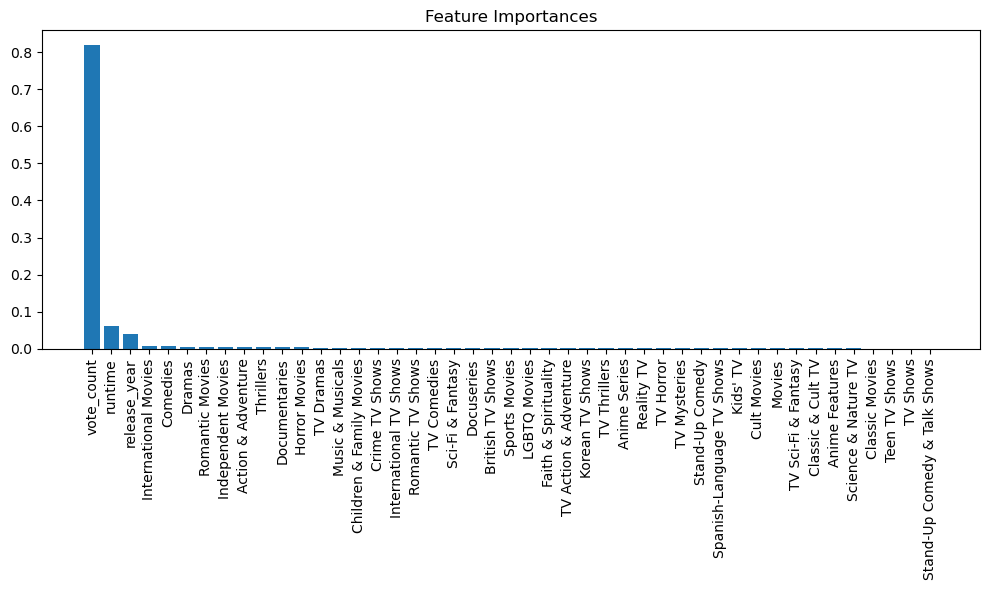

In [32]:
# Instantiate a RandomForestRegressor 
rf = RandomForestRegressor()

# Train the model 
rf.fit(X_train, y_train)

# Get feature importance scores
importances = rf.feature_importances_

feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()


This makes it clear that the encoded genre_types in the machine learning process as it serve's little to zero impact

# KNN MODELING

In [ ]:
# use get_dummies if needed
# X = pd.get_dummies(X)
# X.head()
#if dimensions are off, check shape using .shape

In [34]:
# Split target column from dataset again using knowledge from feature_importance
y = df['vote_average']
X = df[['vote_count','runtime','release_year']]

# Training variables
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

In [35]:
# Creating scaler instance
scaler = StandardScaler()

# Fit training data with scaler
X_scaler = scaler.fit(X_train)

# Scale training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [36]:
# Initiate model with optimal number of K value, found via elbow model
model = KNeighborsClassifier(n_neighbors = 3)

In [37]:
# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
# Predictions
y_predictions = model.predict(X_test_scaled)

# View predictions
print(y_predictions)

[3 6 3 ... 6 7 0]


# Evaluate model: Classification Report & Confusion Matrix

In [42]:
# Run confusion matrix
confusion_matrix(y_predictions,y_test)

array([[492,  15,  30,  22,  54,  95, 133,  86,  22,   7,  18],
       [  4,   0,   0,   1,   3,   7,  10,   9,   1,   1,   1],
       [  5,   0,   3,   3,   7,  18,  16,  11,   4,   1,   1],
       [  6,   2,   5,   7,  25,  33,  28,  17,   2,   0,   0],
       [ 15,   1,   1,  10,  36,  81, 108,  40,  10,   1,   1],
       [ 33,   1,   5,  17,  61, 159, 188,  89,  19,   1,   3],
       [ 32,   1,   5,  12,  33, 181, 265, 108,  17,   1,   3],
       [  7,   0,   2,   2,   6,  26,  70,  52,   7,   1,   1],
       [  0,   0,   0,   1,   1,   1,   1,   1,   5,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [43]:
# Run Classification report
print(classification_report(y_predictions,y_test))

              precision    recall  f1-score   support

           0       0.83      0.51      0.63       974
           1       0.00      0.00      0.00        37
           2       0.06      0.04      0.05        69
           3       0.09      0.06      0.07       125
           4       0.16      0.12      0.14       304
           5       0.26      0.28      0.27       576
           6       0.32      0.40      0.36       658
           7       0.13      0.30      0.18       174
           8       0.06      0.45      0.10        11
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.35      2928
   macro avg       0.17      0.20      0.16      2928
weighted avg       0.43      0.35      0.37      2928



/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# Run Accuracy report
accuracy = accuracy_score(y_test,y_predictions)

print("Accuracy:",accuracy)

Accuracy: 0.3480191256830601


# ATTEMPT #2 WITH K = 2

In [45]:
# Initiate model with optimal number of K value, found via elbow model
model = KNeighborsClassifier(n_neighbors = 2)

# Train the model
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [46]:
# Predictions
y_predictions = model.predict(X_test_scaled)

# View predictions
print(y_predictions)

[4 6 3 ... 6 6 2]


In [48]:
print(classification_report(y_predictions,y_test))

              precision    recall  f1-score   support

           0       0.83      0.57      0.68       862
           1       0.05      0.02      0.03        46
           2       0.06      0.04      0.05        69
           3       0.08      0.04      0.06       134
           4       0.16      0.11      0.13       335
           5       0.35      0.27      0.30       769
           6       0.30      0.41      0.34       584
           7       0.07      0.27      0.11       113
           8       0.06      0.31      0.10        16
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.35      2928
   macro avg       0.18      0.19      0.16      2928
weighted avg       0.42      0.35      0.37      2928



/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/qudsiaahmad/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
accuracy = accuracy_score(y_test,y_predictions)

print("Accuracy:",accuracy)

Accuracy: 0.35040983606557374
